In [318]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

from matplotlib import style
style.use('ggplot')

import numpy as np

In [361]:
data,labels = make_blobs(n_samples=10000,n_features=2,cluster_std=1)

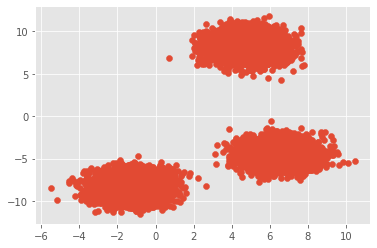

In [362]:
plt.scatter(data[:,0],data[:,1]);

In [372]:
k = 3
tol = 0.000000001
max_iter = 300

In [373]:
centroids = {}

## inicializando os centroids com os 3 primeiros valores de data
for i in range(k):
    centroids[i] = data[i]

{0: array([-1.29079479, -8.28838212]), 1: array([5.10864983, 5.8794518 ]), 2: array([ 6.56477209, -4.97280327])}
4.513734039181113
{0: array([-1.29079479, -8.28838212]), 1: array([4.78343234, 8.22357811]), 2: array([ 6.51864127, -4.54932779])}
33.503794471193075
Optmized


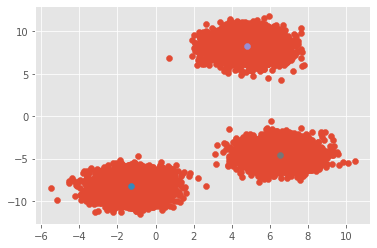

In [374]:
for i in range(max_iter):
    
    classification = {}
    
    for i in range(k):
        classification[i] = []
        
    for point in data:
        distance = [math.sqrt((centroid[0] - point[0])**2 + (centroid[1] - point[1])**2) for centroid in centroids.values()]
        point_label = np.argmin(distance)
        classification[point_label].append(point)
        
    prev_centroids = dict(centroids)
    
    for label in classification:
        centroids[label] = np.average(classification[label],axis=0)
        
    
    optmized = True
    
    for label in centroids:
        
        original_centroid = prev_centroids[label]
        
        current_centroid = centroids[label]
        
        
        if np.sum((current_centroid - original_centroid)/ original_centroid *100.0) > tol:
            
            print(centroids)
            print(np.sum((current_centroid - original_centroid)/ original_centroid *100.0))
            
            
            optmized = False
    
    if optmized:
        print('Optmized')
        
        plt.scatter(data[:,0],data[:,1])
        for label in centroids.values():
            plt.scatter(x=label[0],y=label[1])
        
        break    

In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/home/nasserboan/projetos/unsup/data/meu_dataset.csv')
#df.drop(df[df.cases > 200].index,axis=0,inplace=True)
df.head()

,county,cases,deaths
0,Abbeville,84,0
1,Acadia,741,21
2,Accomack,116,0
3,Ada,4264,41
4,Adair,325,8


In [322]:
from scipy.spatial.distance import euclidean
import numpy as np

class MyKMeans:
    def __init__(self,k=3,max_iter=300,tol=0.0001,method='inertia',data=None):
        self.k = k
        self.max_iter = max_iter
        self.tol = tol
        self.method = method
        self.data = data
        
        
    def _initialize_centroids(self):
        
        quant_quantis = 1/self.k
        
        initial_centroids = []
        
        for k in range(1,self.k+1):
            
            initial_centroids.append([np.quantile(self.data[:,0],k*quant_quantis),np.quantile(self.data[:,1],k*quant_quantis)])
            
        return np.array(initial_centroids)
    
    
    def fit_k_means(self):
        
        centroids = self._initialize_centroids()
        
        ## iterando sobre a quantidade max_iter
        for n_iter in range(self.max_iter):
            
            ## criando os clusters
            classification = {}
            
            for cluster in range(self.k):
                classification[cluster] = []
            
            ## calculando as distancias
            for point in self.data:
                distancias = [euclidean(point,centroid) for centroid in centroids]
                
                ## achando o indice do menor valor na lista distancias
                cluster = np.argmin(distancias)
                
                ## adicionando esse ponto ao cluster 
                classification[cluster].append([value for value in point])
            
            ## salvando o centroids
            
            ## atribuindo novos centroids
            for cluster in classification:
                centroids[cluster] = np.mean(classification[cluster],axis=0)
            
            ## TODO
            
            ## implementar parada
            ## criar gif animado
            ## criar metodo relatório
            
            
        
        plt.scatter(x = self.data[:,0],y = self.data[:,1],c = 'orange')    
        plt.scatter(x = centroids[:,0],y = centroids[:,1],c=['red','blue','black'],marker='X',s=150)
        
        
            
            ## parando
            
#             plt.cla()
#             ax = plt.scatter(x = centroids[:,0],y = centroids[:,1],c=['red','blue','black'])
# #             ax.set_ylim(0,150)
# #             ax.set_xlim(0,5)
#             fig = ax.get_figure()
#             fig.savefig(f'images/{n_iter}.png')

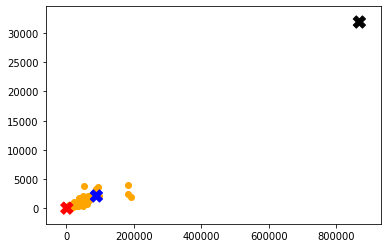

In [323]:
MyKMeans(k=3,data = df[['cases','deaths']].values,max_iter = 200).fit_k_means()

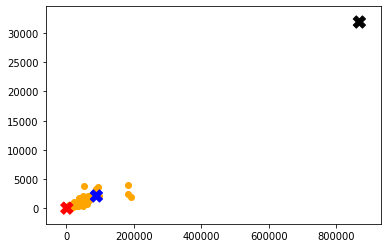

In [325]:
from sklearn.cluster import KMeans

data = df[['cases','deaths']].values
plt.scatter(x = data[:,0],y = data[:,1],c = 'orange')

centroids = KMeans(3,max_iter=200,tol=0.0001).fit(data).cluster_centers_
plt.scatter(x = centroids[:,0],y = centroids[:,1],c=['red','black','blue'],marker='X',s=150)

In [306]:
import glob
import moviepy.editor as mpy

gif_name = 'COVID.gif'
fps = 3
file_list = glob.glob('images/*')
clip = mpy.ImageSequenceClip(file_list, fps=fps)
clip.write_gif('{}.gif'.format(gif_name), fps=fps)

t:   4%|▍         | 9/201 [00:00<00:02, 86.99it/s, now=None]

MoviePy - Building file COVID.gif.gif with imageio.


In [260]:
centroids,prev_centroids

(array([[ 21.14688129,   0.51911469],
        [ 75.38683128,   1.63374486],
        [153.50649351,   3.99350649]]),
 array([[ 21.14688129,   0.51911469],
        [ 75.38683128,   1.63374486],
        [153.50649351,   3.99350649]]))

In [275]:
!pip install moviepy

     |████████████████████████████████| 7.8 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 22.2 MB 4.2 MB/s eta 0:00:011
  Created wheel for moviepy: filename=moviepy-1.0.2-py3-none-any.whl size=110729 sha256=e5475304fba12277336e8a6016ce60d3c6b446d349737c64f5ac50ddeaa4a32f
  Stored in directory: /home/nasserboan/.cache/pip/wheels/f0/36/f2/32c37d2b7a4f04622ccec875f71ebf5f33f892cea410f26454
  Created wheel for proglog: filename=proglog-0.1.9-py3-none-any.whl size=6146 sha256=7989da129f683ce123c6ed595959a65631de86a890e104f92710ac16a91e45d2
  Stored in directory: /home/nasserboan/.cache/pip/wheels/12/36/1f/dc61e6ac10781d63cf6fa045eb09fa613a667384e12cb6e6e0
Successfully built moviepy proglog


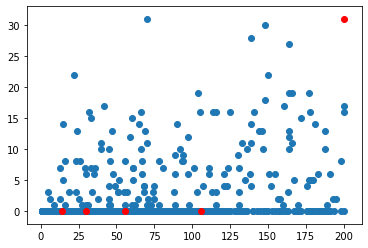

In [115]:
plt.scatter(df.cases,df.deaths)
plt.scatter(x = MyKMeans(k=5,data = df[['cases','deaths']].values)._initialize_centroids()[:,0],y = MyKMeans(k=5,data = df[['cases','deaths']].values)._initialize_centroids()[:,1],c='r')

In [95]:
MyKMeans(k=5,data = df[['cases','deaths']].values)._initialize_centroids()[:,0]

array([2.50000e+01, 7.36000e+01, 2.31000e+02, 1.02220e+03, 8.68824e+05])

In [116]:
iter

<function iter>

,county,cases,deaths
0,Abbeville,84,0
1,Acadia,741,21
2,Accomack,116,0
3,Ada,4264,41
4,Adair,325,8


In [25]:
_, bins = pd.qcut(df.cases,3,retbins=True)
bins

array([1.00000e+00, 5.30000e+01, 3.76000e+02, 8.68824e+05])

In [30]:
np.quantile(df.cases,0.99)

48187.12999999992

In [53]:
k=3
1/k

0.3333333333333333

In [54]:
for k in range(1,k+1):
    print(k)
    print(0.33*k)
    print(np.quantile(df.cases,0.33*k))

1
0.33
52.0
2
0.66
364.0
3
0.99
48187.12999999992


In [47]:
for k in range(0,k):
    print(np.quantile(df.deaths,0.33*k))

0.0
0.0
8.0
